In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
import keras
from tqdm.notebook import tqdm
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import VGG19
from keras.callbacks import EarlyStopping
import tensorflow as tf
from PIL import Image
import glob
import os
import cv2
import random
import json
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
path = '/content/drive/MyDrive/pet'
sample_img = sorted(glob.glob(path+'/json/*.jpg'))
sample_json = sorted(glob.glob(path+'/json/*.json'))
sample = 'A_10_CHI_CM_20221129_10_001213_01'
sample = cv2.imread(f'{path}/input_img/{sample}.jpg')
#sample_label = json.load(open(f'{path}/label/{sample}.json'))
label_mapping = pd.read_csv(f'{path}/DiseaseCode.csv')

In [ ]:
sample_img[:10]

['/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_01.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_02.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_03.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_06.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_08.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_11.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_13.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_14.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_16.jpg',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_18.jpg']

In [ ]:
sample_json[:10]

['/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_01.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_02.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_03.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_06.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_08.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_11.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_13.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_14.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_16.json',
 '/content/drive/MyDrive/pet/json/A_10_CHI_CM_20221102_10_000449_18.json']

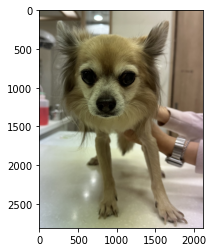

In [ ]:
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def transform_num(data):#Diease Name 을 숫자로 변환
    for idx, code in enumerate(label_mapping['DieaseCode']):
        if data == code:
            num_code = label_mapping['Num_classify'][idx]

    return num_code


In [ ]:
#hyperparameters
epochs = 10
EPOCHES_TO_WAIT_WITH_NO_IMPORVEMENT = 3
lr = 0.01
gamma = 0.7
seed = 42
test_percentage=0.1
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

image_width = 682
image_height = 512
image_size = (image_width, image_height)
num_classes = 14
batch_size = 64

In [ ]:
def resize_image():
    for image in tqdm(sample_img):
        x = image.split('/')
        x.reverse()
        file_name = x[0]
        img = cv2.imread(image, 1)
        cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst=img)
        img_re = cv2.resize(img, (682, 512), interpolation = cv2.INTER_A    
        img = Image.fromarray(img_re)
        img.save('/content/drive/MyDrive/pet/resized2/'+file_name)

In [ ]:
samples = glob.glob(path+'/resized2/*')
samples

In [ ]:
# cnt = 0
# for i in tqdm(test):
#     train_label = json.load(open(i))
#     if 'medical' in train_label['metadata']:
#         cnt += 1
#         if train_label['metadata']['medical']['disease']:
#             print(i)
#         print(train_label['metadata']['medical']['disease'])
        

# print(cnt)

In [ ]:
train_images = samples

train_list = []
cnt_img = len(train_images)
for img_path in tqdm(train_images):
    img_path
    x = img_path.split('/')
    x.reverse()
    file_name = x[0][:-4]
    train_label = json.load(open(f'{path}/json/{file_name}.json'))
    determent = train_label['metadata']
    if 'medical' in determent and determent['medical']['disease'] == 'ABN':
        disease = transform_num(determent['medical']['diseaseName'])
    else:
        disease = transform_num('HEALTH')


    train_list.append((img_path, disease))


  0%|          | 0/8306 [00:00<?, ?it/s]

In [ ]:
#Visualizing the Data

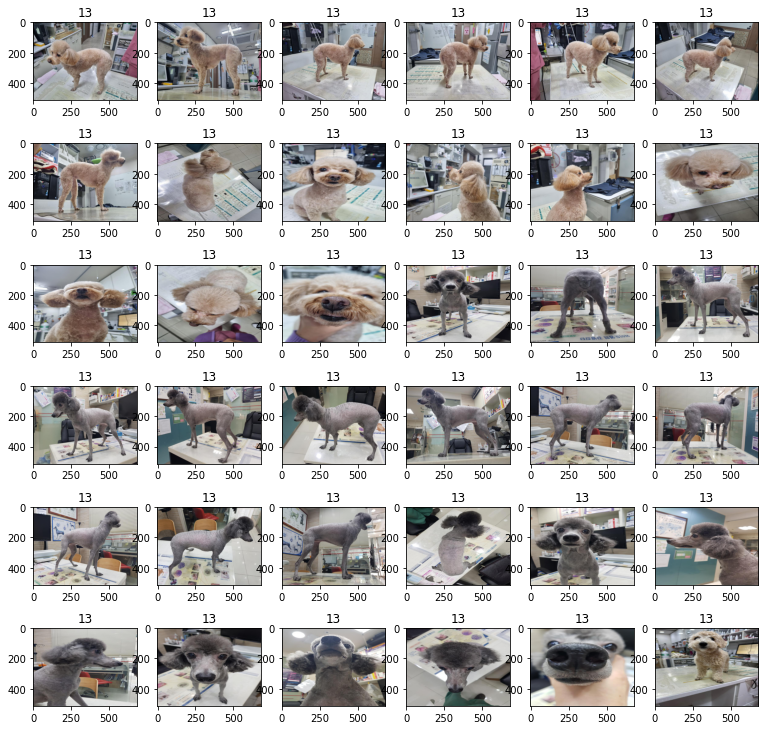

In [ ]:
random_idx = np.random.randint(1, len(train_list), size=16)
fig, axes = plt.subplots(6, 6, figsize=(13,13))

for idx, ax in enumerate(axes.ravel()):
    img = Image.open(train_list[idx][0])
    ax.set_title(train_list[idx][1])
    ax.imshow(img)

In [ ]:
#train.csv 만들기기
def making_csv():
    df = pd.DataFrame(columns = ['path', 'disease_code', 'disease_name'])
    for t_list in train_list:
        new_data = {
            'path': t_list[0],
            'disease_code': t_list[1]
        }
        df = df.append(new_data, ignore_index=True)
    df.to_csv(path+'/train2.csv')

In [ ]:
dict(label_mapping['Diease_classify(ENG)']).values()

dict_values(['Dermatology ', 'Musculoskeletal', 'Neurology', 'Ocular', 'Respiratory', 'Cardiovascular', 'Hematology', 'Gastrointestinal', 'Urinary', 'Reproductive', 'Endocrinology', 'Infectious and parasitic', 'Others', 'Healthy'])

In [ ]:
train_csv = pd.read_csv(path+'/train2.csv')
# train_csv['disease_name'] = train_csv.disease_code.map(label_mapping['Diease_classify(ENG)'])
# train_csv.to_csv(path+'/train2.csv')
train_csv

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,path,disease_code,disease_name
0,0,0,0,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
1,1,1,1,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
2,2,2,2,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
3,3,3,3,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
4,4,4,4,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
...,...,...,...,...,...,...
8301,8301,8301,8301,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy
8302,8302,8302,8302,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy
8303,8303,8303,8303,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy
8304,8304,8304,8304,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy


In [ ]:
#DataLoader
train, valid = train_test_split(train_csv,
                                test_size = test_percentage,
                                random_state=42, stratify = train_csv['disease_name'])

In [ ]:
directory = path + '/resized2'
directory

'/content/drive/MyDrive/pet/resized2'

In [ ]:
train_csv

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,path,disease_code,disease_name
0,0,0,0,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
1,1,1,1,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
2,2,2,2,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
3,3,3,3,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
4,4,4,4,/content/drive/MyDrive/pet/resized2/A_10_CHI_C...,13,Healthy
...,...,...,...,...,...,...
8301,8301,8301,8301,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy
8302,8302,8302,8302,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy
8303,8303,8303,8303,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy
8304,8304,8304,8304,/content/drive/MyDrive/pet/resized2/B_10_POO_C...,13,Healthy


In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
NO_OF_CLASSES = 5
BATCH_SIZE = 64
epochs = 25

In [ ]:
train_image = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)
valid_image = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input
)
training_dataset = train_image.flow_from_dataframe(
                                                    train,
                                                    directory = path + '/resized2',
                                                    seed = 42,
                                                    x_col = 'path',
                                                    y_col = 'disease_name',
                                                    classes = ['Dermatology ', 'Musculoskeletal', 'Neurology', 'Ocular', 'Respiratory', 'Cardiovascular', 'Hematology', 'Gastrointestinal', 'Urinary', 'Reproductive', 'Endocrinology', 'Infectious and parasitic', 'Others', 'Healthy'],
                                                    traget_size = image_size,
                                                    class_mode = 'categorical',
                                                    interpolation = 'nearest',
                                                    shuffle = True,
                                                    batch_size = BATCH_SIZE
                                                   )

validation_dataset = valid_image.flow_from_dataframe(
                                                    valid,
                                                    directory = path + '/resized2',
                                                    seed = 42,
                                                    x_col = 'path',
                                                    y_col = 'disease_name',
                                                    classes = ['Dermatology ', 'Musculoskeletal', 'Neurology', 'Ocular', 'Respiratory', 'Cardiovascular', 'Hematology', 'Gastrointestinal', 'Urinary', 'Reproductive', 'Endocrinology', 'Infectious and parasitic', 'Others', 'Healthy'],
                                                    traget_size = image_size,
                                                    class_mode = 'categorical',
                                                    interpolation = 'nearest',
                                                    shuffle = True,
                                                    batch_size = BATCH_SIZE
)

Found 7475 validated image filenames belonging to 14 classes.
Found 831 validated image filenames belonging to 14 classes.


In [ ]:
Load_model = True
if not Load_model:
    pet_model = Sequential(name='pet_disease')
    pet_model.add(VGG19(input_shape = (image_width, image_height, 3),
                                   include_top = False,
                                   weights = 'imagenet'))
    pet_model.add(GlobalAveragePooling2D())
    pet_model.add(Flatten())
    pet_model.add(Dense(256, activation = 'relu'))
    pet_model.add(Dropout(0.5))
    pet_model.add(BatchNormalization());
    pet_model.add(Dense(num_classes, activation = 'softmax'))

    pet_model.summary()
    keras.utils.plot_model(pet_model)
    
    ## Optimizer Definition
    Adam_Optimizer = Adam(learning_rate = 0.001)

    pet_model.compile(
                                loss = "categorical_crossentropy", 
                                optimizer = Adam_Optimizer, 
                                metrics = ["accuracy"])
else:
    pet_model = keras.models.load_model(f'{path}/model/VGG.h5')
    print('Model Loaded')
    pet_model.optimizers = Adam(learning_rate = 0.001)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy',
                           patience = EPOCHES_TO_WAIT_WITH_NO_IMPORVEMENT,
                           restore_best_weights=True)

save_best_model = ModelCheckpoint(filepath = f'{path}/model/VGG.h5',
                                  save_best_only = True,
                                  monitor = 'val_loss',
                                  mode = 'min')
#효과없을경우 lr 감소
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 2,
                              min_lr = 1e-7,
                              mode = 'min',
                              verbose = 1)
Trained_model = pet_model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = epochs,
    callbacks = [
        save_best_model
    ],
    verbose = 1
)

pet_model.save(f'{path}/model/VGG.h5')
print("Model saved")

Epoch 1/25


InvalidArgumentError: ignored

In [ ]:
pet_model.save(f'{path}/model/VGG_3.h5')

In [ ]:
print(Trained_model.history.keys())

In [ ]:
import keras
import glob
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/pet/model'
pet_model = keras.models.load_model(f'{path}/VGG_2.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ", fontsize=20)

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy', fontsize=15)
    ax1.set_xlabel('Epochs', fontsize=15)
    ax1.set_ylabel('Accuracy', fontsize=15)
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss', fontsize=15)
    ax2.set_xlabel('Epochs', fontsize=15)
    ax2.set_ylabel('Loss', fontsize=15)
    ax2.legend(['training', 'validation'])
    plt.show()

In [ ]:
# Train_Val_Plot(Trained_model.history['accuracy'],Trained_model.history['val_accuracy'],
#               Trained_model.history['loss'],Trained_model.history['val_loss'])

In [ ]:
from PIL import Image
import numpy as np
test_dir = '/content/drive/MyDrive/pet/test'
test_images = glob.glob(f'{test_dir}/*')
predic = 0
size = (512, 682)
for image in test_images:
    img = Image.open(image)
    img = img.resize(size)
    img = np.expand_dims(img, axis = 0)
    print(img)
    #predic.append(np.argmax(pet_model.predict(img)))
    predic = (pet_model.predict(img).argmax(axis=1))

['/content/drive/MyDrive/pet/test/B_10_CHI_SF_20221116_10_000929_11.jpg',
 '/content/drive/MyDrive/pet/test/B_10_CHI_SF_20221116_10_000929_01.jpg']

In [ ]:
print(predic[0])

13
